In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Focused Beam at IP')

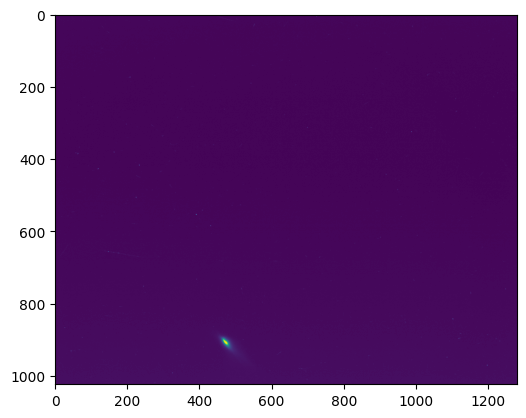

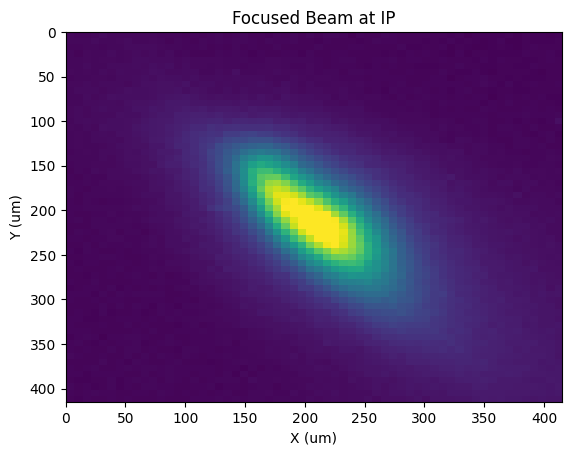

In [2]:
image_path = '../../Images/2024-08-08/2024-08-08 16-00-58_Cam4_focused5.png'
csv_path = '../../Images/2024-08-08/2024-08-08 16-00-58_Cam4_focused5.csv'

# Read image into np array
image = np.array(Image.open(image_path))

# Read data associated with image
df = pd.read_csv(csv_path, index_col=0, header=None).squeeze('columns')

# Apply roi
xc, yc = int(float(df.xc)), int(float(df.yc))
h, w = 60, 60

calibration = 7.03
x = np.arange(w)*calibration
y = np.arange(h)*calibration


fig, ax = plt.subplots()
ax.imshow(image)


roi_image = image[int(yc-h/2):int(yc+h/2), int(xc-w/2):int(xc+w/2)]
fig, ax = plt.subplots()
ax.imshow(roi_image, extent=[x.min(), x.max(), y.max(), y.min()], aspect='auto')
ax.set_xlabel('X (um)')
ax.set_ylabel('Y (um)')
ax.set_title('Focused Beam at IP')
